In [30]:
%load_ext autoreload
%autoreload 2
import structify_net as stn
import structify_net.viz as viz
import structify_net.zoo as zoo
import structify_net.scoring as scoring
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
rank = zoo.sort_distances(128)

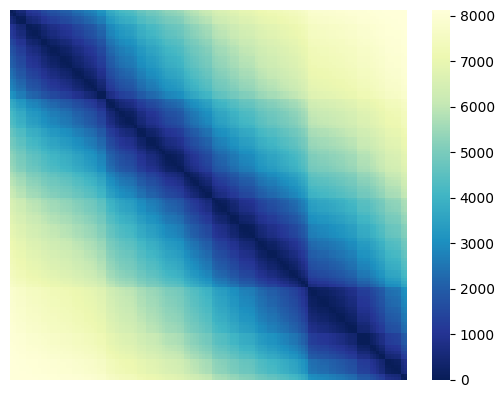

In [3]:
rank.plot_matrix(cbar=True)

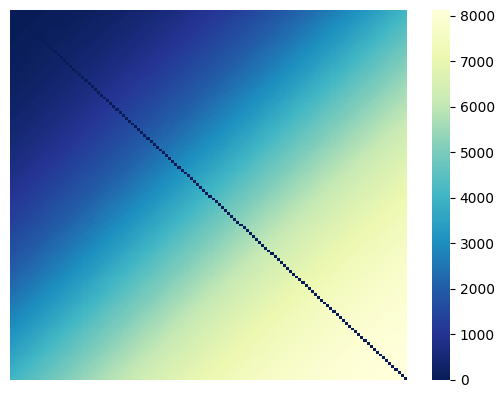

In [4]:
rank2 = zoo.sort_nestedness(128)
rank2.plot_matrix(cbar=True)

In [5]:
model = rank2.get_generator(0.1,m=128*10)

In [6]:
model

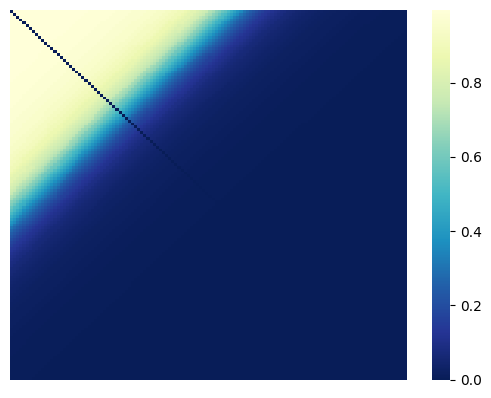

In [7]:
model.plot_matrix(cbar=True)

In [8]:
model = rank.get_generator(0.1,m=128*10)

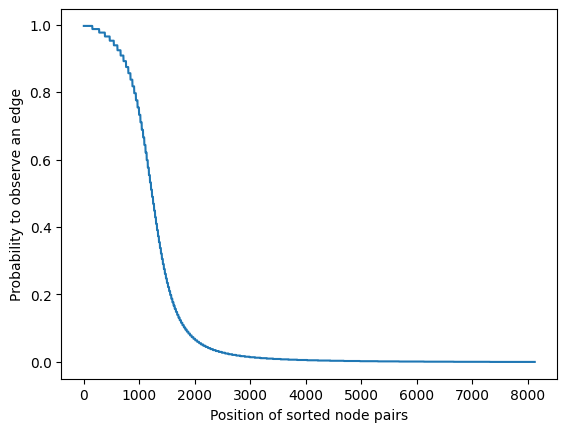

In [9]:
model.plot_proba_function()

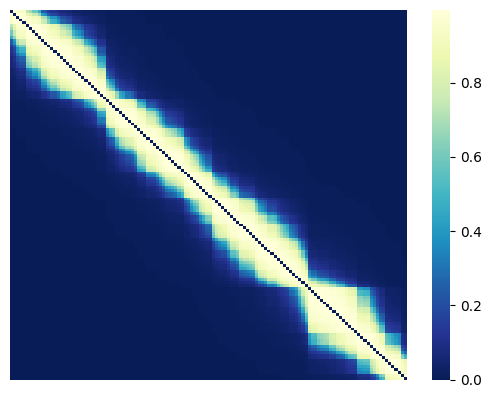

In [10]:
model.plot_matrix(cbar=True)

<AxesSubplot: >

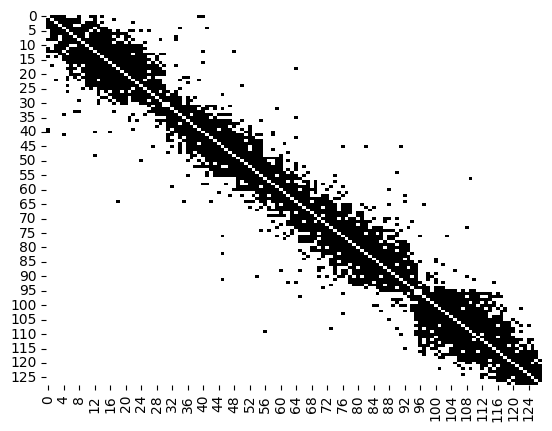

In [11]:
g = model.generate()
viz.plot_adjacency_matrix(g,nodeOrder=model.rank_model.node_order)

In [12]:
model2 = rank.get_generator(0.5,m=128*10)

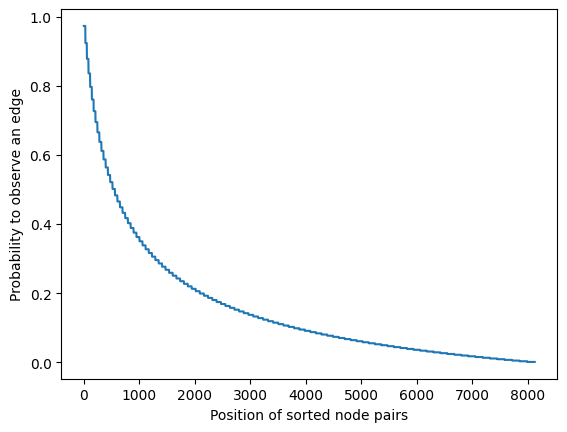

In [13]:
model2.plot_proba_function()

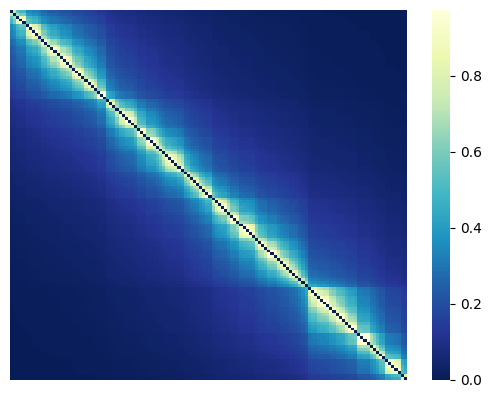

In [14]:
model2.plot_matrix(cbar=True)

<AxesSubplot: >

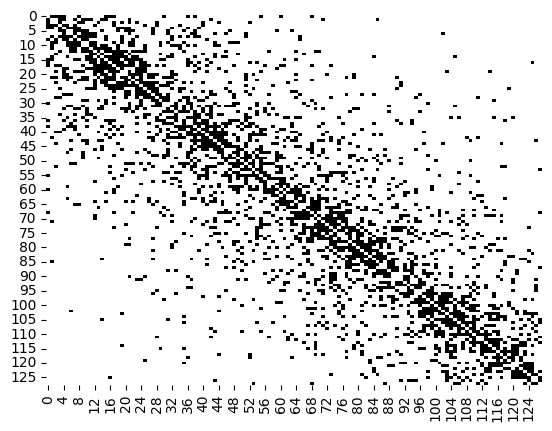

In [15]:
g = model2.generate()
viz.plot_adjacency_matrix(g,nodeOrder=model2.rank_model.node_order)

In [16]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

def compute_emd(x1, x2):
    # Normalize the distributions
    p = x1 / np.sum(x1)
    q = x2 / np.sum(x2)

    # Calculate the CDFs
    cdf_p = np.cumsum(p)
    cdf_q = np.cumsum(q)

    # Compute the cost matrix
    M = cdist(cdf_p[:, np.newaxis], cdf_q[:, np.newaxis], 'euclidean')

    # Compute the optimal transport plan
    row_ind, col_ind = linear_sum_assignment(M)

    # Compute the optimal sequence of distributions
    eps = 1e-10  # regularization parameter to avoid division by zero
    T = np.zeros((len(x1), len(x2)))
    for i, j in zip(row_ind, col_ind):
        T[i, j] = np.sqrt((cdf_p[i] - cdf_q[j])**2 + eps)
    T = np.cumsum(T, axis=0)
    T = T / np.max(T, axis=0)

    return T

# Example usage
x1 = [1]*10+[0]*90
x2 = [0.1]*100
T = compute_emd(x1, x2)

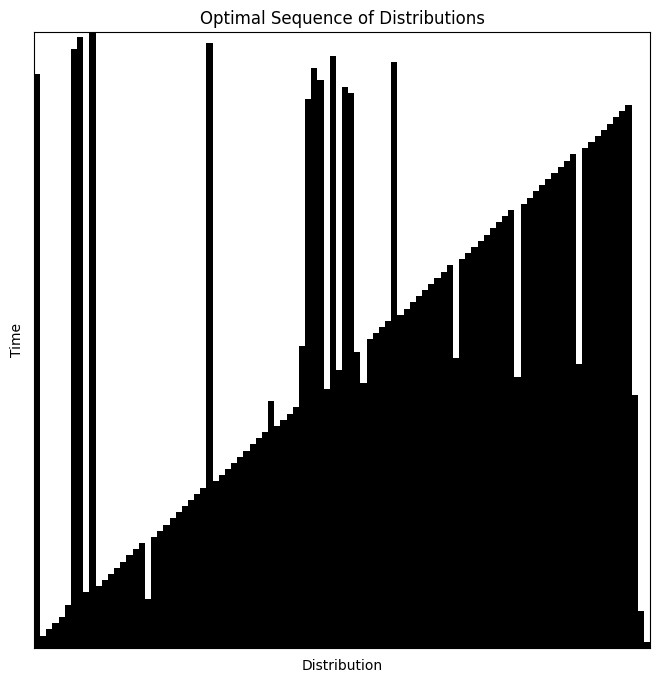

In [17]:
import matplotlib.pyplot as plt

def plot_distributions(T):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(T, cmap='gray_r', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Distribution')
    ax.set_ylabel('Time')
    ax.set_title('Optimal Sequence of Distributions')
    plt.show()

# Example usage
plot_distributions(T)

In [18]:
import numpy as np
import matplotlib.pylab as pl
import ot
from ot.datasets import make_1D_gauss as gauss

ImportError: dlopen(/opt/homebrew/lib/python3.11/site-packages/ot/lp/emd_wrap.cpython-311-darwin.so, 0x0002): tried: '/opt/homebrew/lib/python3.11/site-packages/ot/lp/emd_wrap.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/python3.11/site-packages/ot/lp/emd_wrap.cpython-311-darwin.so' (no such file), '/opt/homebrew/lib/python3.11/site-packages/ot/lp/emd_wrap.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))

In [19]:
%pip install POT


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


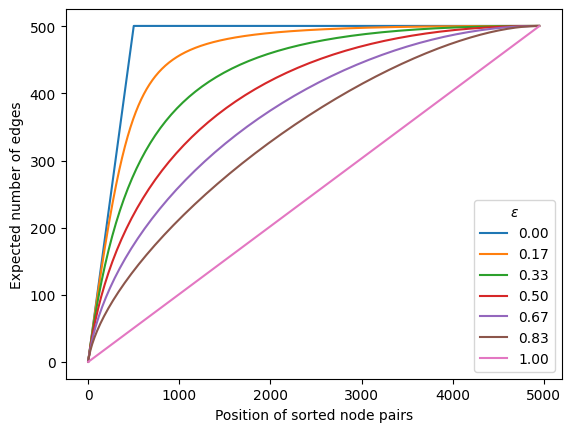

In [36]:
n=100
m=500
fig, ax = plt.subplots()
for epsilon in np.arange(0,1.1,1/6):
    probas = zoo.sort_nestedness(n).get_generator(epsilon=epsilon,m=m)
    elt = probas.plot_proba_function(cumulative=True,ax=ax)
    #elt=viz.plot_proba_function(probas,ax=ax)
    elt[-1].set_label(format(epsilon, '.2f'))
    #fig_tem.plot(label="pouet"+str(epsilon))
ax.legend(title="$\epsilon$")


In [111]:
n=len(nx.karate_club_graph().nodes)
m=len(nx.karate_club_graph().edges)
detail_evolution = zoo.sort_fractal_hierarchical(n).generate_graph(epsilon=0.1,m=m)

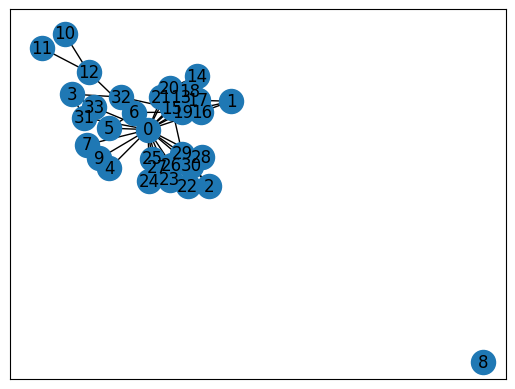

In [112]:
nx.draw_networkx(detail_evolution)

In [113]:
zoo.sort_fractal_hierarchical(n)

In [114]:
scoring.degree_heterogeneity(detail_evolution)

0.3759744861800141

In [115]:
scoring.is_degree_heterogeneous(detail_evolution)

True

In [116]:
scoring.hierarchy(detail_evolution)

0

In [117]:
detail_evolution.degree

DegreeView({0: 24, 1: 3, 2: 3, 3: 3, 4: 2, 5: 2, 6: 2, 7: 1, 8: 0, 9: 2, 10: 1, 11: 1, 12: 3, 13: 7, 14: 5, 15: 10, 16: 7, 17: 8, 18: 6, 19: 7, 20: 7, 21: 5, 22: 5, 23: 5, 24: 4, 25: 5, 26: 5, 27: 6, 28: 4, 29: 9, 30: 5, 31: 3, 32: 3, 33: 3})

In [118]:
nx.clustering(detail_evolution)

{0: 0.13043478260869565,
 1: 0.6666666666666666,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 1.0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 1.0,
 10: 0,
 11: 0,
 12: 0,
 13: 0.6666666666666666,
 14: 0.8,
 15: 0.4666666666666667,
 16: 0.6190476190476191,
 17: 0.5357142857142857,
 18: 0.7333333333333333,
 19: 0.38095238095238093,
 20: 0.6190476190476191,
 21: 0.7,
 22: 0.3,
 23: 0.3,
 24: 0.5,
 25: 0.7,
 26: 0.7,
 27: 0.6,
 28: 0.6666666666666666,
 29: 0.3888888888888889,
 30: 0.6,
 31: 0.6666666666666666,
 32: 0.3333333333333333,
 33: 0.6666666666666666}